In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn import tree

# Modelos
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import pickle


In [2]:
sismos = pd.read_csv("../Union data set/sismos_completo.csv")
daños = pd.read_csv("../estefi/daños_sin_nulos.csv")


In [3]:
# Transformaciones
daños.drop(columns= ["desaparecidos"], inplace= True)

sismos['fecha'] = pd.to_datetime(sismos['fecha'])
daños['fecha'] = pd.to_datetime(daños['fecha'])

In [4]:
daños.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id_danio    280 non-null    int64         
 1   fecha       280 non-null    datetime64[ns]
 2   estado      280 non-null    object        
 3   pais        280 non-null    object        
 4   afectados   280 non-null    int64         
 5   fallecidos  280 non-null    int64         
 6   heridos     280 non-null    int64         
 7   viv_destr   280 non-null    int64         
 8   viv_afect   280 non-null    int64         
 9   id_sismo    280 non-null    int64         
dtypes: datetime64[ns](1), int64(7), object(2)
memory usage: 22.0+ KB


# Prueba 1

In [6]:
df= daños[["afectados", "fallecidos", "heridos", "viv_destr", "viv_afect"]]

In [7]:
df =df[df["afectados"]<100000]

In [8]:
# Crear el modelo K-means con 3 clusters
kmeans = KMeans(n_clusters=3)

# Ajustar el modelo a los datos
kmeans.fit(df)

# Obtener las etiquetas de los clusters asignados a cada punto de datos
labels = kmeans.labels_

# Agregar las etiquetas de los clusters al DataFrame original
df['Cluster'] = labels

c:\Users\Clarita\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [9]:
df.groupby("Cluster").count()

,afectados,fallecidos,heridos,viv_destr,viv_afect
Cluster,,,,,
0,276,276,276,276,276
1,1,1,1,1,1
2,2,2,2,2,2


In [10]:
df_formula = pd.DataFrame({
    "fallecidos": df["fallecidos"] * 100,
    "heridos": df["heridos"] * 10,
    "afectados": df["afectados"],
    "viv_destr": df["viv_destr"] * 10,
    "viv_afect": df["viv_afect"]
})

In [11]:
# Crear el modelo K-means con 3 clusters
kmeans = KMeans(n_clusters=3)

# Ajustar el modelo a los datos
kmeans.fit(df_formula)

# Obtener las etiquetas de los clusters asignados a cada punto de datos
labels = kmeans.labels_

# Agregar las etiquetas de los clusters al DataFrame original
df_formula['Cluster'] = labels

c:\Users\Clarita\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [12]:
df_formula.groupby("Cluster").count()

,fallecidos,heridos,afectados,viv_destr,viv_afect
Cluster,,,,,
0,276,276,276,276,276
1,1,1,1,1,1
2,2,2,2,2,2


In [13]:
df_formula["total"] = df_formula[df_formula.columns.difference(["Cluster"])].sum(axis=1)


In [14]:
df_sin_cero =df_formula[df_formula["total"] > 1]

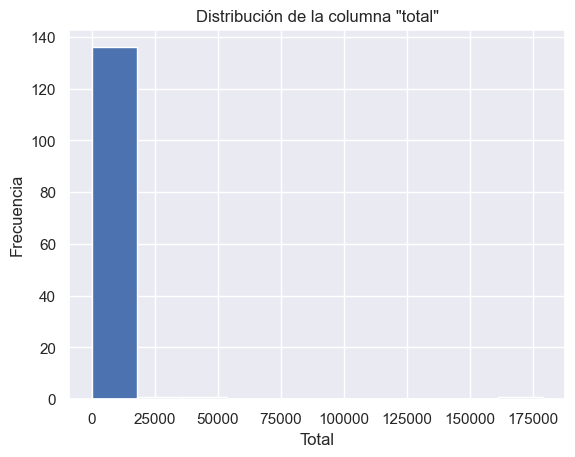

In [15]:
plt.hist(df_sin_cero["total"])  # Puedes ajustar el número de bins según tus necesidades
plt.xlabel('Total')
plt.ylabel('Frecuencia')
plt.title('Distribución de la columna "total"')
plt.grid(True)

# Prueba 2

In [16]:
juntas = daños.merge(sismos, how= 'inner', left_on= 'id_sismo', right_on= "id sismo")

In [17]:
juntas.drop(columns= ['id_danio', 'fecha_x', 'estado', 'pais', 'id sismo','id_sismo', 'fecha_y','hora', 'latitud', 'longitud', 'id_lugar'], inplace= True)

In [18]:
# Crear el modelo K-means con 3 clusters
kmeans = KMeans(n_clusters=3)

# Ajustar el modelo a los datos
kmeans.fit(juntas)

# Obtener las etiquetas de los clusters asignados a cada punto de datos
labels = kmeans.labels_

# Agregar las etiquetas de los clusters al DataFrame original
juntas['Cluster'] = labels

c:\Users\Clarita\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [19]:
juntas.groupby("Cluster").count()

,afectados,fallecidos,heridos,viv_destr,viv_afect,profundidad,magnitud
Cluster,,,,,,,
0,276,276,276,276,276,276,276
1,1,1,1,1,1,1,1
2,3,3,3,3,3,3,3


In [20]:
juntas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 280 entries, 0 to 279
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   afectados    280 non-null    int64  
 1   fallecidos   280 non-null    int64  
 2   heridos      280 non-null    int64  
 3   viv_destr    280 non-null    int64  
 4   viv_afect    280 non-null    int64  
 5   profundidad  280 non-null    float64
 6   magnitud     280 non-null    float64
 7   Cluster      280 non-null    int32  
dtypes: float64(2), int32(1), int64(5)
memory usage: 18.6 KB


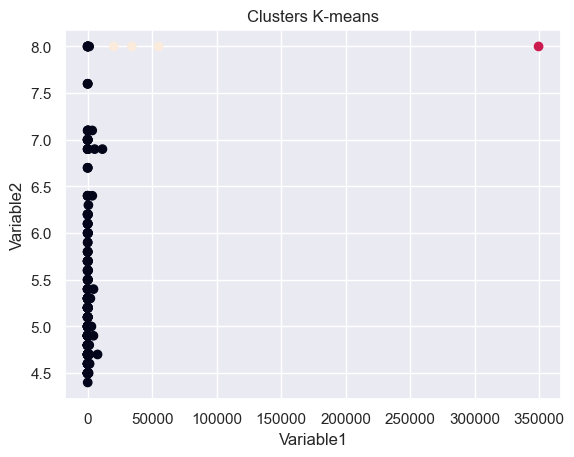

In [21]:
plt.scatter(juntas['afectados'], juntas['magnitud'], c=juntas['Cluster'])
plt.xlabel('Variable1')
plt.ylabel('Variable2')
plt.title('Clusters K-means')
plt.show()

In [22]:
df_formula2 = pd.DataFrame({
    "fallecidos": juntas["fallecidos"] * 100,
    "heridos": juntas["heridos"] * 10,
    "afectados": juntas["afectados"],
    "viv_destr": juntas["viv_destr"] * 10,
    "viv_afect": juntas["viv_afect"],
    "profundidad" : juntas["profundidad"],
    "magnitud" : juntas["magnitud"]
})

In [23]:
df_formula2["total"] = df_formula2[df_formula2.columns.difference(["Cluster", "magnitud", "profundidad"])].sum(axis=1)

In [24]:
df_formula2.to_csv("prueba_1.csv", index= False)

# Prueba 3: Agrupar lo registros por sismos

In [4]:
daños.columns

Index(['id_danio', 'fecha', 'estado', 'pais', 'afectados', 'fallecidos',
       'heridos', 'viv_destr', 'viv_afect', 'id_sismo'],
      dtype='object')

In [5]:
# Me quedo con las columnas que me interesan
por_sismo = daños[['afectados', 'fallecidos',
       'heridos', 'viv_destr', 'viv_afect', 'id_sismo']]

# Agrupo por id_sismo
por_sismo = por_sismo.groupby("id_sismo").sum()

In [6]:
# Combino los dos data sets
juntas = por_sismo.merge(sismos, how= 'inner', left_on= 'id_sismo', right_on= "id sismo")

# Borro las columnas que no me sirven para la clasificación
juntas.drop(columns= [ 'fecha','hora', 'latitud', 'longitud', 'id_lugar'], inplace= True)

In [7]:
juntas

,afectados,fallecidos,heridos,viv_destr,viv_afect,id sismo,profundidad,magnitud
0,4793,0,0,250,1173,10458,32.0,5.4
1,7,2,0,2,0,10472,51.0,4.7
2,166,0,11,22,2,10476,24.0,6.0
3,0,0,0,0,72,10541,13.0,5.3
4,28,0,0,4,0,10578,8.0,4.8
...,...,...,...,...,...,...,...,...
215,72,0,0,0,18,19794,11.0,5.2
216,0,0,0,0,0,19835,92.0,6.4
217,0,0,0,0,0,19839,104.0,4.8
218,0,0,0,0,2,19844,110.0,5.4


In [8]:
# Creo la fórmula para medir la peligrosidad del sismo
df_formula3 = pd.DataFrame({
    "id_sismo" : juntas["id sismo"],
    "fallecidos": juntas["fallecidos"] * 100,
    "heridos": juntas["heridos"] * 10,
    "afectados": juntas["afectados"],
    "viv_destr": juntas["viv_destr"] * 50,
    "viv_afect": juntas["viv_afect"],
    "profundidad" : juntas["profundidad"],
    "magnitud" : juntas["magnitud"]
})

# Creo la columna que contendrá los valores de la "peligrosidad"
df_formula3["total"] = df_formula3[df_formula3.columns.difference(["id_sismo", "magnitud", "profundidad"])].sum(axis=1)

In [9]:
df_formula3

,id_sismo,fallecidos,heridos,afectados,viv_destr,viv_afect,profundidad,magnitud,total
0,10458,0,0,4793,12500,1173,32.0,5.4,18466
1,10472,200,0,7,100,0,51.0,4.7,307
2,10476,0,110,166,1100,2,24.0,6.0,1378
3,10541,0,0,0,0,72,13.0,5.3,72
4,10578,0,0,28,200,0,8.0,4.8,228
...,...,...,...,...,...,...,...,...,...
215,19794,0,0,72,0,18,11.0,5.2,90
216,19835,0,0,0,0,0,92.0,6.4,0
217,19839,0,0,0,0,0,104.0,4.8,0
218,19844,0,0,0,0,2,110.0,5.4,2


In [10]:
def asignar_valor(valor):
    if valor <= 100:
        return 1
    elif valor <= 1000:
        return 2
    else:
        return 3

#Le asigno a la columna peligro las etiquetas correspondientes
df_formula3["peligro"] = df_formula3['total'].apply(asignar_valor)

##  Prueba cluster

In [11]:
# Crear el modelo K-means con 3 clusters
kmeans = KMeans(n_clusters=3)

# Ajustar el modelo a los datos
kmeans.fit(df_formula3)

# Obtener las etiquetas de los clusters asignados a cada punto de datos
labels = kmeans.labels_

# Agregar las etiquetas de los clusters al DataFrame original
df_formula3['Cluster'] = labels

c:\Users\Clarita\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [13]:
df_formula3.groupby("Cluster").count()

,id_sismo,fallecidos,heridos,afectados,viv_destr,viv_afect,profundidad,magnitud,total,peligro
Cluster,,,,,,,,,,
0,9,9,9,9,9,9,9,9,9,9
1,1,1,1,1,1,1,1,1,1,1
2,210,210,210,210,210,210,210,210,210,210


In [34]:
#df_formula3.to_csv("prueba_2.csv", index= False)

# Clasificación

## Dejo el data set listo para usar en el modelo de clasificacion

In [12]:
sismos2 = sismos.copy()

In [13]:
sismos2.rename(columns= {"id sismo" : "id_sismo"}, inplace= True)

In [14]:
#Agrego la columna peligro al df sismos
sismos2 = pd.merge(sismos2, df_formula3[['id_sismo', 'peligro']], on='id_sismo', how='left')

In [15]:
# Me quedo solo con los simos que tienen etiqueta
sismos2 = sismos2.dropna(subset=['peligro'])

#Reseteo el index
sismos2.reset_index(drop= True, inplace= True)

In [16]:
# Me quedo con las variables que sirven para el modelo
sismo_modelo = sismos2[["magnitud", "profundidad", "peligro"]]

# Modifico el tipo de datos
sismo_modelo["peligro"] = sismo_modelo["peligro"].astype(int)
sismo_modelo["profundidad"] = sismo_modelo["profundidad"].astype(int)

C:\Users\Clarita\AppData\Local\Temp\ipykernel_13080\306633977.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sismo_modelo["peligro"] = sismo_modelo["peligro"].astype(int)
C:\Users\Clarita\AppData\Local\Temp\ipykernel_13080\306633977.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sismo_modelo["profundidad"] = sismo_modelo["profundidad"].astype(int)


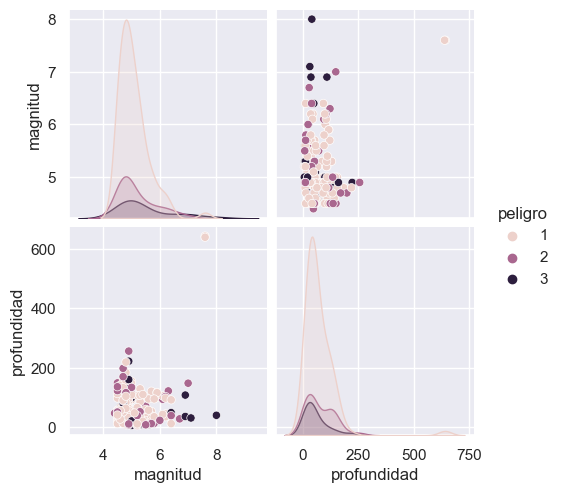

In [17]:
sns.pairplot(sismo_modelo, hue="peligro")
plt.show()

Defino las variables (X) y la target (y)

In [18]:
X = sismo_modelo[["magnitud", "profundidad"]]

y= sismo_modelo["peligro"]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

# Prueba de modelos

## Decision Tree Classifier

In [20]:
# Instanciamos un objeto de la clase DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion= 'entropy', max_depth= 7, max_features= None, max_leaf_nodes= None, min_impurity_decrease= 0.0, min_samples_leaf= 2, min_samples_split= 5, splitter= 'random')

# Entrenamos el modelo
clf.fit(X_train.values,y_train.values)

# Predecimos
y_pred_a = clf.predict(X_test.values) # para generar una metrica de evaluacion

#Evaluamos
print(round(accuracy_score(y_test,y_pred_a),2))

0.73


In [ ]:
plt.figure(figsize = (10,7))
tree.plot_tree(clf, filled = True)
plt.show()

### Mejora de hiperparámetros (Grid Search) - Decision Tree Classifier 

In [53]:
param_grid = {
    'criterion': ['gini', 'entropy'],  # Criterio de impureza
    'splitter': ['best', 'random'],  # Estrategia de división
    'max_depth': [None, 3, 5, 7],  # Profundidad máxima del árbol
    'min_samples_split': [2, 5, 10],  # Número mínimo de muestras requeridas para dividir un nodo
    'min_samples_leaf': [1, 2, 3],  # Número mínimo de muestras requeridas en cada hoja
    'max_features': ['sqrt', 'log2', None],  # Número máximo de características consideradas en cada división
    'max_leaf_nodes': [None, 5, 10, 20],  # Número máximo de nodos hoja permitidos
    'min_impurity_decrease': [0.0, 0.1, 0.2]  # Umbral para la disminución de la impureza requerida para realizar una división
}

In [54]:
#Instancio el modelo
clf = DecisionTreeClassifier()

# Le pasamos la grilla que creamos
model = GridSearchCV(clf, param_grid=param_grid) #knn = modelo, parametros y cant de 

# Entrenamos
model.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 3, 5, 7],
                         'max_features': ['sqrt', 'log2', None],
                         'max_leaf_nodes': [None, 5, 10, 20],
                         'min_impurity_decrease': [0.0, 0.1, 0.2],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [70]:
print("Mejores hiperparámetros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

scores = pd.DataFrame(model.cv_results_) #con esto hacemos que nos muestre todas las posibles combinaciones en un data frame
#scores

Mejores hiperparámetros: {'criterion': 'entropy', 'max_depth': 7, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 5, 'splitter': 'random'}
Mejor Score: 0.7117948717948719



In [71]:
prediction = model.predict(X_test)

In [72]:
# Matriz de Confusion

from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test,prediction)
print("Matriz de confusión:")
print(cm)

Matriz de confusión:
[[15  2  0]
 [ 1  0  0]
 [ 3  1  0]]


In [73]:
print('Exactitud:', accuracy_score(y_test, prediction))

Exactitud: 0.6818181818181818


In [74]:
# Reporte de Clasificacion

from sklearn.metrics import classification_report

report = classification_report(y_test, prediction)
print("Reporte de Clasificación:")
print(report)

Reporte de Clasificación:
              precision    recall  f1-score   support

           1       0.79      0.88      0.83        17
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         4

    accuracy                           0.68        22
   macro avg       0.26      0.29      0.28        22
weighted avg       0.61      0.68      0.64        22



c:\Users\Clarita\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Clarita\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Clarita\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

## K- Neighbors Classifier

In [66]:
# Instanciamos un objeto de la clase KNeighborsClassifier
vecinos = KNeighborsClassifier(algorithm='auto', leaf_size= 1, metric= 'minkowski', n_neighbors= 8,  p = 2, weights= 'uniform')

# Entrenamos
vecinos.fit(X_train.values,y_train.values)

# Predecimos
y_pred_v = vecinos.predict(X_test.values)

# Evaluamos
print(round(accuracy_score(y_test,y_pred_v),2))

0.77


### Mejora de hiperparámetros (Grid Search) - K Neighbors Classifier

In [33]:
param_grid = {
    'n_neighbors': np.arange(1, 20),  # Número de vecinos
    'weights': ['uniform', 'distance'],  # Pesos aplicados a los vecinos
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algoritmo utilizado
    'leaf_size': [1,3,5,7,10],  # Tamaño de la hoja
    'p': [1, 2],  # Parámetro de distancia (1: distancia de Manhattan, 2: distancia euclidiana)
    'metric': ['minkowski', 'euclidean', 'manhattan']  # Métrica de distancia
}

In [34]:
#Instancio
knn = KNeighborsClassifier()

# Le pasamos la grilla que creamos
model = GridSearchCV(knn, param_grid=param_grid, cv=5)

# Entrenamos
model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [1, 3, 5, 7, 10],
                         'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'p': [1, 2], 'weights': ['uniform', 'distance']})

In [35]:
print("Mejores hiperparámetros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

scores = pd.DataFrame(model.cv_results_) #con esto hacemos que nos muestre todas las posibles combinaciones en un data frame
#scores

Mejores hiperparámetros: {'algorithm': 'auto', 'leaf_size': 1, 'metric': 'minkowski', 'n_neighbors': 8, 'p': 2, 'weights': 'uniform'}
Mejor Score: 0.696923076923077



## SVM

In [65]:
# Crear el modelo SVM
svm_model = SVC(kernel='linear', C= 0.1)

# Entrenar el modelo SVM
svm_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = svm_model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo SVM:",round(accuracy,2))

Precisión del modelo SVM: 0.77


### Mejora de hiperparámetros (Grid Search) - SVM

In [57]:
# Creamos la grilla de hiperparámetros
param_grid = {
    'C': [0.1, 1, 10],  # Valores para el parámetro de regularización C
    'kernel': ['linear', 'rbf', 'poly'], 
    'gamma': [0.1, 1, 'scale']# Tipos de kernel  # Valores para el término independiente del kernel
}


Valores para el coeficiente de kernel gamma
    'degree': [2, 3, 4],  # Grados para el kernel polinómico
    'coef0': [0.0, 0.5, 1.0]

In [58]:
#Instancio el modelo
#svm = SVC()

# Le pasamos la grilla que creamos
#model = GridSearchCV(svm, param_grid=param_grid, cv=5) 

# Entrenamos
#model.fit(X_train, y_train)

In [59]:
#print("Mejores hiperparámetros: "+str(model.best_params_))
#print("Mejor Score: "+str(model.best_score_)+'\n')

#scores = pd.DataFrame(model.cv_results_) #con esto hacemos que nos muestre todas las posibles combinaciones en un data frame
#scores

## Random Forest Classifier

In [64]:
# Crear el modelo RandomForest
rf_classifier = RandomForestClassifier( max_depth= None, max_features= 'sqrt', min_samples_leaf = 4, min_samples_split= 10,n_estimators=100)

# Entrenar el modelo 
rf_classifier.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = rf_classifier.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy,2))

Accuracy: 0.77


### Mejora de hiperparámetros (Grid Search) - Random Forest Classifier

In [38]:
# Creamos la grilla de hiperparámetros para el modelo de vecinos más cercanos
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt']
}

In [39]:
rf = RandomForestClassifier()

In [40]:
# Le pasamos la grilla que creamos
model = GridSearchCV(rf, param_grid=param_grid, cv=5) 

# Entrenamos
model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10], 'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 500]})

In [41]:
print("Mejores hiperparámetros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

scores = pd.DataFrame(model.cv_results_) #con esto hacemos que nos muestre todas las posibles combinaciones en un data frame
#scores

Mejores hiperparámetros: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Mejor Score: 0.6865384615384615



# Modelo a utilizar

## Naive Bayes

In [26]:
# Crear el modelo RandomForest
naive_bayes_classifier = GaussianNB(var_smoothing = 1e-05)

# Entrenar el modelo 
naive_bayes_classifier.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = naive_bayes_classifier.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy,2))

Accuracy: 0.82


### Mejora de hiperparámetros (Grid Search) - Naive Bayes

In [106]:
# Creamos la grilla de hiperparámetros para el modelo de vecinos más cercanos
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}
naive_bayes_model = GaussianNB()
# Le pasamos la grilla que creamos
grid_search = GridSearchCV(naive_bayes_model, param_grid, cv=5)

# Entrenamos
grid_search.fit(X_train, y_train)
print("Mejores hiperparámetros: "+str(grid_search.best_params_))
print("Mejor Score: "+str(grid_search.best_score_)+'\n')

Mejores hiperparámetros: {'var_smoothing': 1e-05}
Mejor Score: 0.7017948717948718



### Airflow

In [22]:
# Tarea de automatización, agregar sismo Airflow

from datetime import datetime, timedelta

import pandas as pd
import psycopg2

from keys import (
    PGHOST,
    PGUSER,
    PGPORT,
    PGDATABASE,
    PGPASSWORD,
    AZURE_STORAGE_NAME,
    AZURE_STORAGE_KEY,
    AZURE_CONTAINER_NAME,
    AZURE_BLOB_NAME
)


# Datos de conexión a PostgreSQL
pg_host = PGHOST
pg_user = PGUSER
pg_port = PGPORT
pg_database = PGDATABASE
pg_password = PGPASSWORD

# Datos de conexión al datalake
storage_account_name = AZURE_STORAGE_NAME
storage_account_key = AZURE_STORAGE_KEY
container_name = AZURE_CONTAINER_NAME
blob_name = AZURE_BLOB_NAME


def consulta_postgres(query, fetch=False):
    try:
        # Conexión a PostgreSQL
        conn = psycopg2.connect(
            host=pg_host,
            port=pg_port,
            database=pg_database,
            user=pg_user,
            password=pg_password
        )
        cursor = conn.cursor()

        # Ejecutar las consultas de inserción
        cursor.execute(query)

        if fetch == True:
            # Obtener los resultados de la consulta
            resultados = cursor.fetchall()
            # Cerrar la conexión y el cursor
            cursor.close()
            conn.close()

            return resultados

        # Confirmar los cambios en la base de datos
        conn.commit()

        # Cerrar la conexión y el cursor
        cursor.close()
        conn.close()

    except (Exception, psycopg2.Error) as error:
        print("Error al ejecutar la inserción en PostgreSQL:", error)


In [23]:
def obtener_ultima_fila():
    query = "SELECT * FROM sismos ORDER BY id_sismo DESC LIMIT 1"

    ultima_fila = consulta_postgres(query, fetch=True)[0]

    ultima_fila = [str(i) for i in ultima_fila][1:-1]

    return ultima_fila

In [24]:
ultimo = obtener_ultima_fila()

predecir = pd.DataFrame({'profundidad': [ultimo[3]], 'magnitud': [ultimo[4]]})

# Realiza la clasificación

In [78]:
predecir["peligro"] = naive_bayes_classifier.predict(predecir[["magnitud", "profundidad"]])

In [83]:
# Obtén el predictor del modelo
predictor = naive_bayes_classifier.predict

# Guarda el predictor en un archivo
with open('predictor.pkl', 'wb') as archivo:
    pickle.dump(predictor, archivo)


Dejarlo en una variable que le doy los datos y me predice.
Exportarlo en un archivo pickle 

In [27]:
with open('modelo.pkl', 'wb') as archivo:
    pickle.dump(naive_bayes_classifier, archivo)


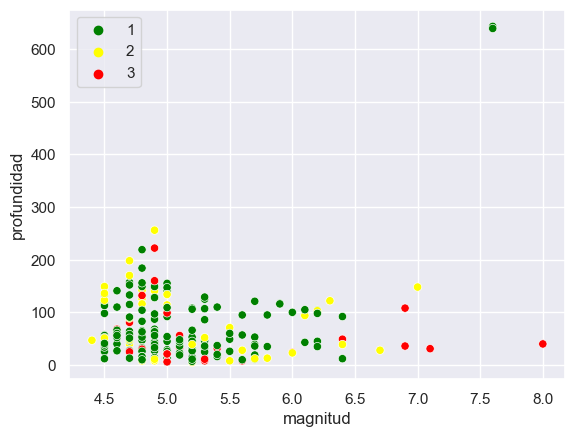

In [77]:
# Crear el scatter plot
sns.scatterplot(data=sismo_modelo, x='magnitud', y='profundidad', hue='peligro',  palette=['green', "yellow", 'red'])

# Mover la leyenda a la esquina superior izquierda
plt.legend(loc='upper left', bbox_to_anchor=(0, 1))
plt.show()

In [23]:
sismo_modelo

,magnitud,profundidad,peligro
0,5.4,32,3
1,4.7,51,2
2,6.0,24,3
3,5.3,13,1
4,4.8,8,2
...,...,...,...
215,5.2,11,1
216,6.4,92,1
217,4.8,104,1
218,5.4,110,1
